In [2]:
import pyekfmm as fmm
import numpy as np
import matplotlib.pyplot as plt

import pyekfmm as fmm
import numpy as np

%matplotlib widget

0.004408602150537634 0.004563380281690141 0.0001875


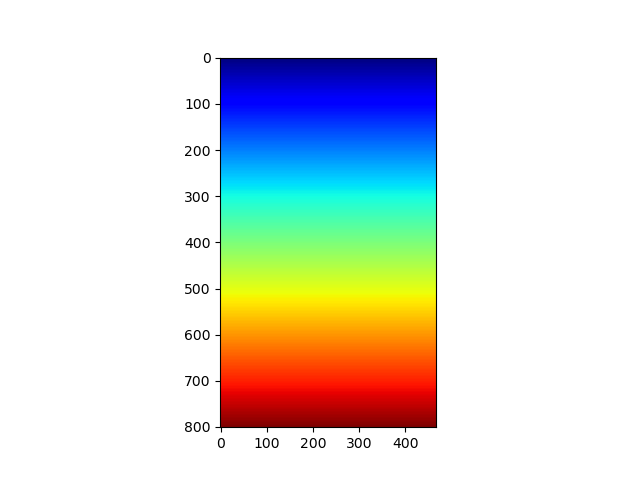

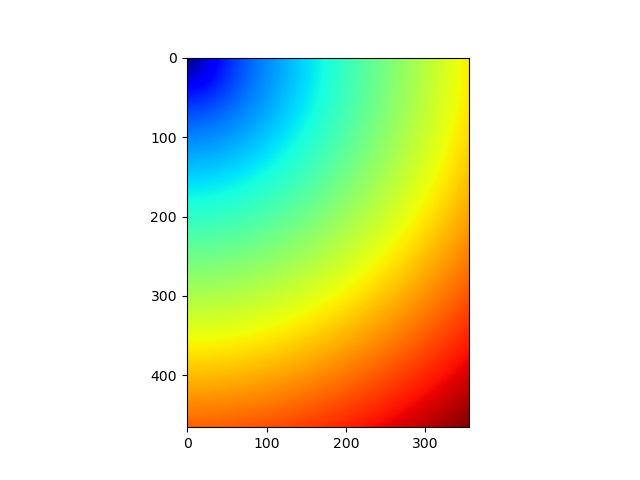

356 466 1
2.05


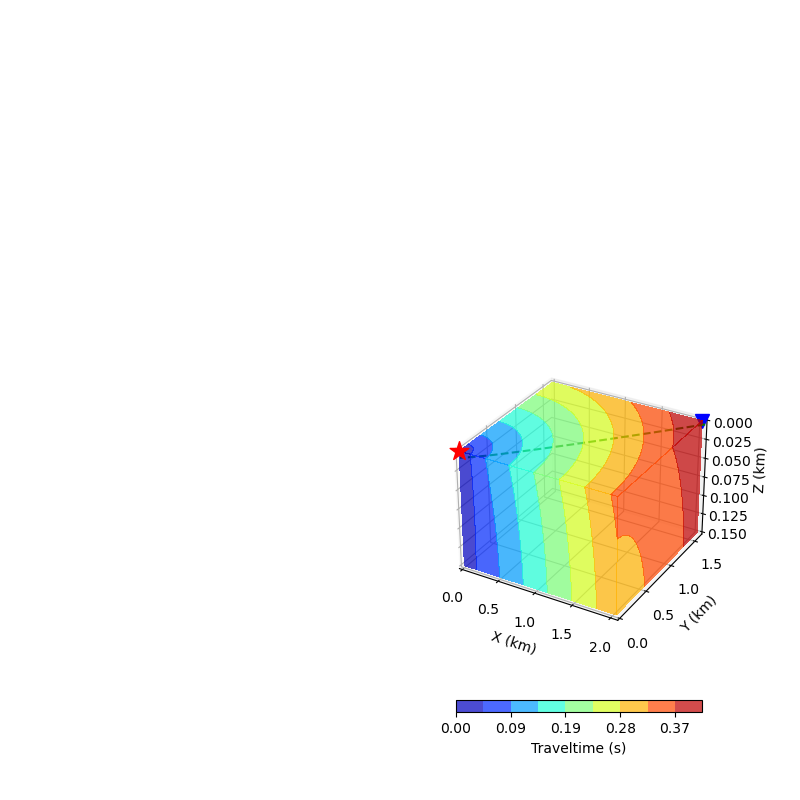

In [5]:
plt.close('all')

## This DEMO is a 2D example [x,z] with velocity gradient and with one shot
# 
#  COPYRIGHT: Yangkang Chen, 2022, The University of Texas at Austin


### 3D 


v1=3;
v2=7;
nz=801;
nx=466;
ny=356;
dx=2.05/(nx-1);
dy=1.62/(ny-1);
dz=0.15/(nz-1);
print(dx,dy,dz)
# vel=3.0*np.ones([101*101,1],dtype='float32'); #velocity axis must be x,y,z respectively
v=np.linspace(v1,v2,nz);
v=np.expand_dims(v,1);
h=np.ones([1,nx])
vel=np.multiply(v,h,dtype='float32'); #z,x

vel3d=np.zeros([nz,nx,ny],dtype='float32');
for ii in range(ny):
	vel3d[:,:,ii]=vel

plt.figure();
plt.imshow(vel3d[:,:,0]);
plt.jet();plt.show()

vxyz=np.swapaxes(np.swapaxes(vel3d,0,1),1,2);
t=fmm.eikonal(vxyz.flatten(order='F'),xyz=np.array([0,0,0]),ax=[0,dx,nx],ay=[0,dy,ny],az=[0,dz,nz],order=2);
time=t.reshape(nx,ny,nz,order='F');#first axis (vertical) is x, second is z
# time=np.swapaxes(np.swapaxes(time,1,2),0,1);

plt.figure();
plt.imshow(time[:,:,0]);
plt.jet();plt.show()

# tz=np.gradient(time,axis=1);
# tx=np.gradient(time,axis=0);
# # or
# tz,tx,ty = np.gradient(time)

tx,ty,tz = np.gradient(time)

# Define dimensions
Nx, Ny, Nz = nx, ny, nz
X, Y, Z = np.meshgrid(np.arange(Nx)*dx, np.arange(Ny)*dy, np.arange(Nz)*dz)

# Specify the 3D data
data=np.transpose(time,(1,0,2)); ## data requires [y,x,z] so tranpose the first and second axis
# data=np.transpose(time,(2,1,0)); #[z,x,y] -> [y,x,z]

kw = {
    'vmin': data.min(),
    'vmax': data.max(),
    'levels': np.linspace(data.min(), data.max(), 10),
}

# Create a figure with 3D ax
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(122, projection='3d')
plt.jet()
# Plot contour surfaces
_ = ax.contourf(
    X[:, :, -1], Y[:, :, -1], data[:, :, 0],
    zdir='z', offset=0, alpha=0.7, **kw
)
_ = ax.contourf(
    X[0, :, :], data[0, :, :], Z[0, :, :],
    zdir='y', offset=0, alpha=0.7, **kw
)
C = ax.contourf(
    data[:, -1, :], Y[:, -1, :], Z[:, -1, :],
    zdir='x', offset=X.max(), alpha=0.7, **kw
)
# --


# Set limits of the plot from coord limits
xmin, xmax = X.min(), X.max()
ymin, ymax = Y.min(), Y.max()
zmin, zmax = Z.min(), Z.max()
ax.set(xlim=[xmin, xmax], ylim=[ymin, ymax], zlim=[zmin, zmax])


# Set labels and zticks
ax.set(
    xlabel='X (km)',
    ylabel='Y (km)',
    zlabel='Z (km)',
#     zticks=[0, -150, -300, -450],
)

# Set zoom and angle view
# ax.view_init(40, -30, 0)
# ax.set_box_aspect(None, zoom=0.9)
# ax.set_aspect('equal')


# Colorbar
cbar=fig.colorbar(C, ax=ax, orientation='horizontal', fraction=0.02, pad=0.1, format= "%.2f", label='Traveltime (s)')
cbar.ax.locator_params(nbins=5)

plt.gca().scatter(0.0,0,0,s=200,marker='*',color='r')

# plt.plot((receivery-1)*dy,(receiverx-1)*dx,(receiverz-1)*dz,'vb',markersize=15);
## plot rays
# plt.plot((paths[1,:]-1)*dy,(paths[0,:]-1)*dx,(paths[2,:]-1)*dz,'g--',markersize=20);



paths,nrays=fmm.stream3d(-ty,-tx,-tz ,ny,nx,1, step=1, maxvert=100000)
plt.plot((nx-1)*dx,(ny-1)*dy,0,'vb',markersize=10);
## plot rays
plt.plot((paths[1,:]-1)*dy,(paths[0,:]-1)*dx,(paths[2,:]-1)*dz,'g--',markersize=20);

plt.gca().invert_zaxis()

print((nx-1)*dx)

# Show Figure
plt.show()
